In [1]:
import os

import rdflib
import oxrdflib

import pandas as pd
from datetime import datetime

import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

from myst_nb import glue


# Loading RDF Datasets and Ontologies

In [2]:
def get_file_ext(filename: str):
    """  """
    return filename.split('.')[-1]

def get_rdf_filenames(dirname: str):
    """  """
    rdf_filenames = []
    for filename in os.listdir(dirname):
        file_path = os.path.join(dirname, filename)
        if os.path.isfile(file_path): 
            if get_file_ext(filename) == 'ttl':
                rdf_filenames.append(filename)
            elif get_file_ext(filename) == 'owl':
                rdf_filenames.append(filename)
    return rdf_filenames

def load_rdf_files(dirnames: list):
    """  """

    g = rdflib.Graph(store=oxrdflib.OxigraphStore())

    for dirname in dirnames:
        print(f'Load RDF data from directory {dirname} into RDF graph.')
    
        rdf_filenames = get_rdf_filenames(dirname)
        for rdf_filename in rdf_filenames:
            if get_file_ext(rdf_filename) == 'owl':
                g.parse(f'{dirname}/{rdf_filename}')
            elif get_file_ext(rdf_filename) == 'ttl':
                g.parse(f'{dirname}/{rdf_filename}', format='ttl')

    return g

In [3]:
rdf_dirnames = ['MONARCH_PHENOPACKET_STORE_DATA', 'HPO']
g = load_rdf_files(rdf_dirnames)

Load RDF data from directory MONARCH_PHENOPACKET_STORE_DATA into RDF graph.
Load RDF data from directory HPO into RDF graph.


# SPARQL Queries

In [4]:
SCENARIO_NR = 5
gene_id = 'HGNC:7989'

## Question 1

Are there any other individuals with a mutation in the same gene?

In [5]:
with open(f'SPARQL/scenario_{SCENARIO_NR}/question1.rq', 'r') as file:
    query = file.read()

query = query.replace('VAR_GENE_ID', gene_id)
glue('scenario5_query_q1', query)

"PREFIX ex: <https://example.org/>\nPREFIX obo: <http://purl.obolibrary.org/obo/>\nPREFIX sio: <http://semanticscience.org/resource/>\nPREFIX dcterms: <http://purl.org/dc/terms/> \nPREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>\n\nSELECT ?phenopacketidval ?creatorname ?createddate\nWHERE {\n    # Find the phenopackets that contain at least one mutation in given gene\n    ?genedescr a obo:NCIT_C16612 ;\n               dcterms:identifier 'HGNC:7989' .\n    ?vardescr sio:SIO_001403 ?genedescr .\n    ?varinterpr sio:SIO_001403 ?vardescr .\n    ?genomicinterp sio:SIO_001403 ?varinterpr .\n    ?diagnosis sio:SIO_001403 ?genomicinterp .\n    ?interpr sio:SIO_001403 ?diagnosis .\n    ?phenopacket sio:SIO_001403 ?interpr ;\n                 a obo:NCIT_C79269 ;\n                 sio:SIO_000228 ?role .\n    \n    # Find phenopacket ID value\n    ?phenopacketid sio:SIO_000020 ?role ;\n\t               sio:SIO_000300 ?phenopacketidval .\n    \n    # Find metadata\n    ?phenopacket sio:SIO_001

In [6]:
result_list = []

results = g.query(query)
result_nr = 0
for result_row in results:
    datetime_str = result_row[2]
    datetime_obj = datetime.fromisoformat(datetime_str)
    date_val = datetime_obj.strftime('%Y-%m-%d %H:%M:%S')

    id_val = result_row[0]

    result_list.append({'phenopacket id': result_row[0],
                        'creator': result_row[1],
                        'creation date': date_val})
    
    result_nr += 1

In [7]:
phenopackets_df = pd.DataFrame(result_list)
glue('scenario5_phenopackets', phenopackets_df)

,phenopacket id,creator,creation date
0,PMID_26467218_individual_6_Cirstea_et_al__14,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
1,PMID_26467218_individual_11_Kraoua_et_al__23,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
2,PMID_26467218_individual_3_Denayer_et_al__22,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
3,PMID_26467218_individual_9_Cirstea_et_al__14,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
4,PMID_26467218_individual_4_Denayer_et_al__22,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
5,PMID_26467218_individual_12_Present_study,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
6,PMID_26467218_individual_1_De_Filippi_et_al__20,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
7,PMID_26467218_individual_2_Runtuwene_et_al__21,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
8,PMID_26467218_individual_9_M_Cirstea_et_al__14,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12
9,PMID_26467218_individual_5_Denayer_et_al__22,ORCID:0000-0002-0736-9199,2024-05-20 20:56:12


## Question 2

What phenotypes and which diseases have been observed in these individuals and how often do they occur in this group of individuals?

In [8]:
phenopacket_ids = phenopackets_df['phenopacket id'].tolist()
quoted_phenopacket_ids = [f'"{id_value}"' for id_value in phenopacket_ids]
query_ids_list_str = ' '.join(quoted_phenopacket_ids)

### Diseases

In [9]:
with open(f'SPARQL/scenario_{SCENARIO_NR}/question2_a.rq', 'r') as file:
    query2 = file.read()

query2 = query2.replace('VAR_ID_LIST', query_ids_list_str)
glue('scenario5_query_q2a', query2)

'PREFIX ex: <https://example.org/>\nPREFIX obo: <http://purl.obolibrary.org/obo/>\nPREFIX sio: <http://semanticscience.org/resource/>\nPREFIX dcterms: <http://purl.org/dc/terms/> \nPREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>\n\nSELECT ?idvalue ?diseaseid ?diseaselabel\nWHERE {\n    # Find relevant phenopackets\n    ?id a obo:IAO_0020000 ;\n        sio:SIO_000300 ?idvalue .\n    VALUES ?idvalue { "PMID_26467218_individual_6_Cirstea_et_al__14" "PMID_26467218_individual_11_Kraoua_et_al__23" "PMID_26467218_individual_3_Denayer_et_al__22" "PMID_26467218_individual_9_Cirstea_et_al__14" "PMID_26467218_individual_4_Denayer_et_al__22" "PMID_26467218_individual_12_Present_study" "PMID_26467218_individual_1_De_Filippi_et_al__20" "PMID_26467218_individual_2_Runtuwene_et_al__21" "PMID_26467218_individual_9_M_Cirstea_et_al__14" "PMID_26467218_individual_5_Denayer_et_al__22" "PMID_26467218_individual_12_F_Present_study" "PMID_26467218_individual_8_Cirstea_et_al__14" "PMID_26467218_individual

In [10]:
results = g.query(query2)

diseases_list = []

for result_row in results:
    diseases_list.append({'phenopacket id': result_row[0], 
                          'disease ID': result_row[1],
                          'disease label': result_row[2]})

In [11]:
diseases_df = pd.DataFrame(diseases_list)
glue('scenario5_diseases', diseases_df)

,phenopacket id,disease ID,disease label
0,PMID_26467218_individual_6_Cirstea_et_al__14,OMIM:613224,Noonan syndrome 6
1,PMID_26467218_individual_11_Kraoua_et_al__23,OMIM:613224,Noonan syndrome 6
2,PMID_26467218_individual_3_Denayer_et_al__22,OMIM:613224,Noonan syndrome 6
3,PMID_26467218_individual_9_Cirstea_et_al__14,OMIM:613224,Noonan syndrome 6
4,PMID_26467218_individual_4_Denayer_et_al__22,OMIM:613224,Noonan syndrome 6
5,PMID_26467218_individual_12_Present_study,OMIM:613224,Noonan syndrome 6
6,PMID_26467218_individual_1_De_Filippi_et_al__20,OMIM:613224,Noonan syndrome 6
7,PMID_26467218_individual_2_Runtuwene_et_al__21,OMIM:613224,Noonan syndrome 6
8,PMID_26467218_individual_9_M_Cirstea_et_al__14,OMIM:613224,Noonan syndrome 6
9,PMID_26467218_individual_5_Denayer_et_al__22,OMIM:613224,Noonan syndrome 6


### Phenotypes

In [12]:
with open(f'SPARQL/scenario_{SCENARIO_NR}/question2_b.rq', 'r') as file:
    query3 = file.read()

query3 = query3.replace('VAR_ID_LIST', query_ids_list_str)
glue('scenario5_query_q2b', query3)

'PREFIX ex: <https://example.org/>\nPREFIX obo: <http://purl.obolibrary.org/obo/>\nPREFIX sio: <http://semanticscience.org/resource/>\nPREFIX dcterms: <http://purl.org/dc/terms/> \nPREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>\n\nSELECT ?idvalue ?phenofeatid ?phenofeatlabel\nWHERE {\n    # Find relevant phenopackets\n    ?id a obo:IAO_0020000 ;\n        sio:SIO_000300 ?idvalue .\n    VALUES ?idvalue { "PMID_26467218_individual_6_Cirstea_et_al__14" "PMID_26467218_individual_11_Kraoua_et_al__23" "PMID_26467218_individual_3_Denayer_et_al__22" "PMID_26467218_individual_9_Cirstea_et_al__14" "PMID_26467218_individual_4_Denayer_et_al__22" "PMID_26467218_individual_12_Present_study" "PMID_26467218_individual_1_De_Filippi_et_al__20" "PMID_26467218_individual_2_Runtuwene_et_al__21" "PMID_26467218_individual_9_M_Cirstea_et_al__14" "PMID_26467218_individual_5_Denayer_et_al__22" "PMID_26467218_individual_12_F_Present_study" "PMID_26467218_individual_8_Cirstea_et_al__14" "PMID_26467218_indivi

In [13]:
results = g.query(query3)

phenofeat_list = []

for result_row in results:
    phenofeat_list.append({'phenopacket ID': result_row[0], 
                           'phenotype ID': result_row[1],
                           'phenotype label': result_row[2]})

glue('scenario5_phenofeat_count', len(phenofeat_list))

326

In [14]:
phenofeat_df = pd.DataFrame(phenofeat_list)

glue('scenario5_phenofeat', phenofeat_df.sample(n=10).sort_index())

,phenopacket ID,phenotype ID,phenotype label
94,PMID_26467218_individual_9_Cirstea_et_al__14,HP:0000028,Cryptorchidism
133,PMID_26467218_individual_12_Present_study,HP:0000767,Pectus excavatum
179,PMID_26467218_individual_2_Runtuwene_et_al__21,HP:0000256,Macrocephaly
184,PMID_26467218_individual_9_M_Cirstea_et_al__14,HP:0000508,Ptosis
198,PMID_26467218_individual_9_M_Cirstea_et_al__14,HP:0006699,Premature atrial contractions
207,PMID_26467218_individual_5_Denayer_et_al__22,HP:0000256,Macrocephaly
233,PMID_26467218_individual_12_F_Present_study,HP:0001561,Polyhydramnios
292,PMID_26467218_individual_10_Kraoua_et_al__23,HP:0001680,Coarctation of aorta
324,PMID_26467218_individual_7_Cirstea_et_al__14,HP:0006699,Premature atrial contractions
325,PMID_26467218_individual_7_Cirstea_et_al__14,HP:0002212,Curly hair


In [15]:
phenopackets_list = list(phenofeat_df['phenopacket ID'].unique())

phenotypes_per_phenopacket_dict = {}

for phenopacket in phenopackets_list:
    phenotypes_of_phenopacket = phenofeat_df.loc[phenofeat_df['phenopacket ID'] == phenopacket]
    phenotypes_df = phenotypes_of_phenopacket[['phenotype ID', 'phenotype label']]
    phenotypes_dict = phenotypes_df.to_dict('records')

    phenotypes_per_phenopacket_dict[phenopacket] = phenotypes_dict

In [16]:
def get_occurrence_percentage(counts):
    """  """
    return "{0:.1f}%".format(counts / len(phenopackets_list) * 100)

phenotype_counts = phenofeat_df['phenotype ID'].value_counts().rename_axis('phenotype ID').reset_index(name='counts')
phenotype_counts['occurrence percentage'] = phenotype_counts['counts'].apply(get_occurrence_percentage)

In [17]:
phenotype_counts['phenotype ID'] = phenotype_counts['phenotype ID'].astype(str)
phenofeat_df['phenotype ID'] = phenofeat_df['phenotype ID'].astype(str)

annotated_phenotype_counts_df = pd.merge(phenotype_counts, phenofeat_df[['phenotype ID', 'phenotype label']], on='phenotype ID', how='left').drop_duplicates().reset_index()
glue('scenario5_phenofeatcounts', annotated_phenotype_counts_df[['phenotype ID', 'phenotype label', 'counts', 'occurrence percentage']])

,phenotype ID,phenotype label,counts,occurrence percentage
0,HP:0000369,Low-set ears,14,100.0%
1,HP:0000316,Hypertelorism,14,100.0%
2,HP:0000957,Cafe-au-lait spot,14,100.0%
3,HP:0012209,Juvenile myelomonocytic leukemia,14,100.0%
4,HP:0000494,Downslanted palpebral fissures,14,100.0%
5,HP:0004322,Short stature,14,100.0%
6,HP:0000348,High forehead,14,100.0%
7,HP:0000508,Ptosis,14,100.0%
8,HP:0000358,Posteriorly rotated ears,14,100.0%
9,HP:0000767,Pectus excavatum,13,92.9%


## Question 3

Do the found phenotypes overlap with the observed phenotypes found in the undiagnosed child?

In [18]:
observed_phenotypes = ['Broad neck', 'Low-set ears', 'Motor delay']

In [21]:
with open(f'SPARQL/scenario_{SCENARIO_NR}/question3.rq', 'r') as file:
    query4 = file.read()

observation_index = 0
hpo_queries = []
for observed_phenotype in observed_phenotypes:
    curr_query = query4.replace('VAR_PHENOTYPE_NAME', observed_phenotype)
    hpo_queries.append(curr_query)

    glue(f'scenario5_query_q4_{observation_index}', curr_query)
    observation_index += 1

"PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>\nPREFIX obo: <http://purl.obolibrary.org/obo/>\n\nSELECT ?iri\nWHERE {\n    ?iri rdfs:label 'Broad neck' .\n}"

"PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>\nPREFIX obo: <http://purl.obolibrary.org/obo/>\n\nSELECT ?iri\nWHERE {\n    ?iri rdfs:label 'Low-set ears' .\n}"

"PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>\nPREFIX obo: <http://purl.obolibrary.org/obo/>\n\nSELECT ?iri\nWHERE {\n    ?iri rdfs:label 'Motor delay' .\n}"

In [23]:
observed_phenotypes_dicts = []

for phenotype_label, hpo_query in zip(observed_phenotypes, hpo_queries):
    results = g.query(hpo_query)
    for row in results:
        iri = row[0]

        if 'HP' in iri:
            id_value = iri.split('/')[-1].replace('_', ':')
            observed_phenotypes_dicts.append({'id': id_value, 'label': phenotype_label})

observed_phenotypes_df = pd.DataFrame.from_dict(observed_phenotypes_dicts)
glue('scenario5_observedphenotypes', observed_phenotypes_df)

,id,label
0,HP:0000475,Broad neck
1,HP:0000369,Low-set ears
2,HP:0001270,Motor delay


In [24]:
all_phenotypes = list(annotated_phenotype_counts_df['phenotype ID'].unique())
all_phenotypes = [str(phenotype) for phenotype in all_phenotypes]
observed_phenotype_ids = list(observed_phenotypes_df['id'].unique())

intersection_phenotypes = list(set(observed_phenotype_ids).intersection(set(all_phenotypes)))
intersecting_phenotypes_strings = []
for phenotype_id in intersection_phenotypes:
    phenotype_label = observed_phenotypes_df.loc[observed_phenotypes_df['id'] == phenotype_id]['label'].values[0]
    intersecting_phenotypes_strings.append(f'{phenotype_label} ({phenotype_id})')

glue('scenario5_matchingphenotypes', ', '.join(intersecting_phenotypes_strings))

'Motor delay (HP:0001270), Low-set ears (HP:0000369)'

In [25]:
non_intersection_phenotypes = list(set(observed_phenotype_ids) - set(all_phenotypes))
non_intersection_phenotypes

['HP:0000475']

In [26]:
def extract_values(g: rdflib.Graph, node: rdflib.URIRef):
    """
        Returns `prefix`, `url`, `name`.
    """
    try:
        return g.namespace_manager.compute_qname(node)
    except ValueError:
        return None, None, None

def get_all_subclass_triples():
    """  """
    hpo_network = nx.DiGraph()

    for s, _, o in g.triples((None, rdflib.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf'), None)):
        _, _, s_name = extract_values(g=g, node=s)
        _, _, o_name = extract_values(g=g, node=o)

        if s_name and o_name:
            hpo_network.add_node(s_name)
            hpo_network.add_node(o_name)
            hpo_network.add_edge(s_name, o_name, label='subClassOf')
    
    return hpo_network

def get_phenotype_node_id(phenotype_id: str):
    """ """
    return phenotype_id.replace(':', '_')

hpo_nx_g = get_all_subclass_triples()
undirected_hpo_nx_g = hpo_nx_g.to_undirected()

all_phenotypes_and_observed = all_phenotypes + non_intersection_phenotypes

phenotypes_dist_matrix = {}
for source_phenotype_id in all_phenotypes_and_observed:
    phenotypes_dist_matrix[source_phenotype_id] = {}
    for target_phenotype_id in all_phenotypes_and_observed:
        path_len = nx.shortest_path_length(G=undirected_hpo_nx_g, 
                                           source=get_phenotype_node_id(source_phenotype_id), 
                                           target=get_phenotype_node_id(target_phenotype_id))
        phenotypes_dist_matrix[source_phenotype_id][target_phenotype_id] = path_len

phenotypes_dist_matrix_df = pd.DataFrame.from_dict(phenotypes_dist_matrix)
phenotypes_dist_matrix_df

,HP:0000369,HP:0000316,HP:0000957,HP:0012209,HP:0000494,HP:0004322,HP:0000348,HP:0000508,HP:0000358,HP:0000767,...,HP:0002212,HP:0000978,HP:0001561,HP:0001195,HP:0032152,HP:0000028,HP:0001639,HP:0001642,HP:0001631,HP:0000475
HP:0000369,0,10,12,10,11,9,11,8,2,8,...,11,8,9,9,9,11,11,11,10,9
HP:0000316,10,0,10,8,9,7,8,5,10,9,...,9,7,7,8,8,9,9,9,8,8
HP:0000957,12,10,0,11,7,10,5,8,12,10,...,8,8,10,8,5,11,12,12,11,9
HP:0012209,10,8,11,0,12,8,10,8,10,10,...,10,7,8,9,8,9,9,10,8,9
HP:0000494,11,9,7,12,0,11,8,7,11,11,...,7,8,11,11,8,10,11,12,11,9
HP:0004322,9,7,10,8,11,0,8,6,9,6,...,8,7,6,7,7,9,9,8,8,7
HP:0000348,11,8,5,10,8,8,0,8,11,8,...,7,7,8,8,7,10,10,10,9,7
HP:0000508,8,5,8,8,7,6,8,0,8,9,...,8,6,6,7,7,9,9,8,8,7
HP:0000358,2,10,12,10,11,9,11,8,0,8,...,11,8,9,9,9,11,11,11,10,9
HP:0000767,8,9,10,10,11,6,8,9,8,0,...,10,8,9,7,7,10,9,10,8,8


In [27]:
new_rows_phenotype_counts = []

for non_intersection_phenotype in non_intersection_phenotypes:
    new_rows_phenotype_counts.append({'phenotype ID': non_intersection_phenotype,
                                      'phenotype label': observed_phenotypes_df.loc[observed_phenotypes_df['id'] == non_intersection_phenotype]['label'].values[0],
                                      'counts': 0, 'occurrence percentage': '0.0%'})

new_rows_annotated_phenotype_counts_df = pd.DataFrame(new_rows_phenotype_counts)

all_phenotype_counts_df = pd.concat([annotated_phenotype_counts_df, new_rows_annotated_phenotype_counts_df], ignore_index=True).drop(columns=['index'])
all_phenotype_counts_df

,phenotype ID,counts,occurrence percentage,phenotype label
0,HP:0000369,14,100.0%,Low-set ears
1,HP:0000316,14,100.0%,Hypertelorism
2,HP:0000957,14,100.0%,Cafe-au-lait spot
3,HP:0012209,14,100.0%,Juvenile myelomonocytic leukemia
4,HP:0000494,14,100.0%,Downslanted palpebral fissures
5,HP:0004322,14,100.0%,Short stature
6,HP:0000348,14,100.0%,High forehead
7,HP:0000508,14,100.0%,Ptosis
8,HP:0000358,14,100.0%,Posteriorly rotated ears
9,HP:0000767,13,92.9%,Pectus excavatum


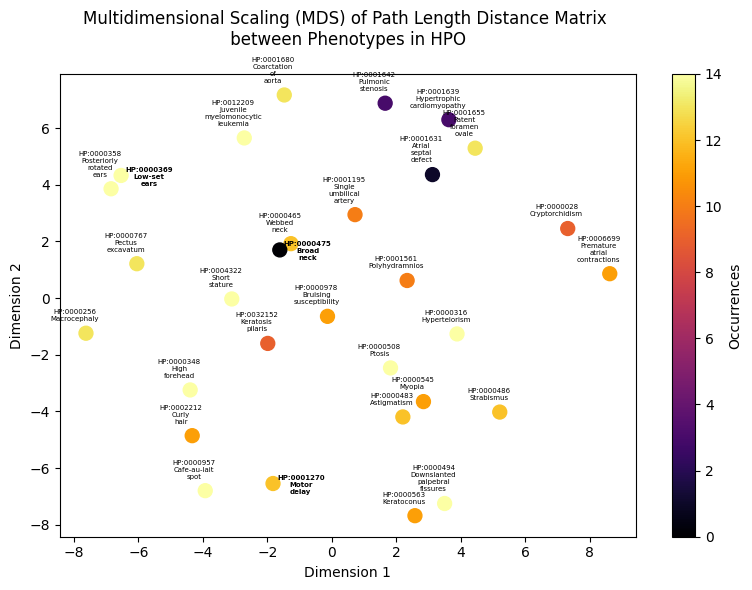

In [28]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
positions = mds.fit_transform(phenotypes_dist_matrix_df)

phenotype_labels = list(all_phenotype_counts_df['phenotype label'])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(positions[:, 0], positions[:, 1], marker='o', c=all_phenotype_counts_df['counts'], cmap='inferno', s=100)

for phenotype_id, label, x, y in zip(phenotypes_dist_matrix_df.index, phenotype_labels, positions[:, 0], positions[:, 1]):
    if phenotype_id in observed_phenotype_ids:
        plt.annotate(f'{phenotype_id}\n{label.replace(' ', '\n')}', xy=(x, y), xytext=(20, -8), textcoords='offset points', ha='center', va='bottom', fontsize=5, weight='bold')
    else:
        plt.annotate(f'{phenotype_id}\n{label.replace(' ', '\n')}', xy=(x, y), xytext=(-8, 8), textcoords='offset points', ha='center', va='bottom', fontsize=5)

plt.colorbar(scatter, label='Occurrences')

plt.title('Multidimensional Scaling (MDS) of Path Length Distance Matrix \n between Phenotypes in HPO \n')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(False)
plt.tight_layout()

plt.savefig('nras_matching_phenotypes.png')